## **PYTHON GRAPHS**

### **GGPLOTS**

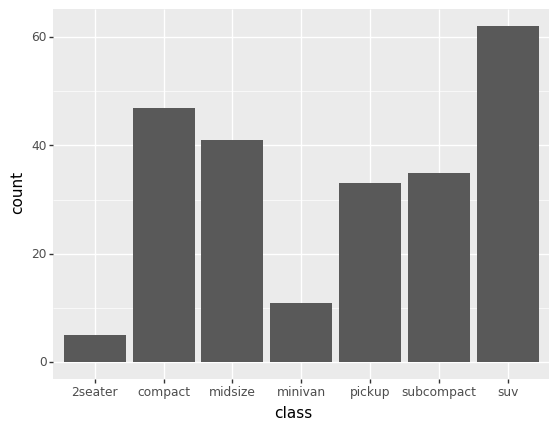

<ggplot: (7551945261)>

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

(ggplot(mpg)         # defining what data to use
 + aes(x='class')    # defining what variable to use
 + geom_bar(size=20) # defining the type of plot to use
)

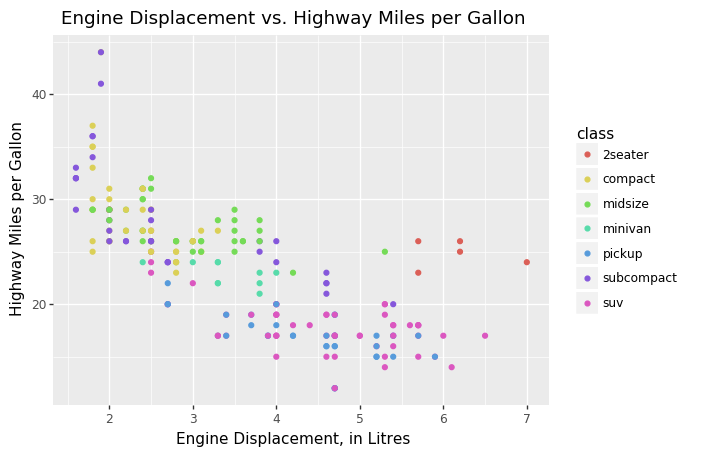

<ggplot: (7552356493)>

In [2]:
(ggplot(mpg)
 + aes(x='displ', y='hwy', color='class')
 + geom_point()
 + labs(title='Engine Displacement vs. Highway Miles per Gallon', x='Engine Displacement, in Litres', y='Highway Miles per Gallon')
)

In [3]:
mpg.dtypes

manufacturer    category
model           category
displ            float64
year               int64
cyl                int64
trans           category
drv             category
cty                int64
hwy                int64
fl              category
class           category
dtype: object

## **Bokeh Basics**

**Simple Line plot**

In [4]:
from bokeh.plotting import figure
from bokeh.io import output_file, show
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')
p.line(x, y, legend="Temp.", line_width=2) 
output_file("fig/lines.html") 
show(p) 

## **Data**: 
Under the hood, your data is converted to column data soucers. You can also do it manually:

In [5]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.array([[33.9,4,65, 'US'],
                            [32.4,4,66, 'Asia'],
                            [21.4,4,109, 'Europe']]), 
                  columns=['mpg','cyl', 'hp', 'origin'],
                  index=['Toyota', 'Fiat', 'Volvo'])

In [6]:
from bokeh.plotting import figure
p1 = figure(plot_width=300, tools='pan,box_zoom')
p1.circle(np.array([1,2,3]), np.array([3,2,1]), fill_color='white')
p1.line([1,2,3,4], [3,4,5,6], line_width=2)
show(p1) 

**Scatter Markers with plot_height & plot_width**

In [7]:
p2 = figure(plot_width=300, plot_height=300,x_range=(0, 8), y_range=(0, 8))
p2.square(np.array([1.5,3.5,5.5]), [1,4,3], color='blue', size=1)
p2.multi_line(pd.DataFrame([[1,2,3],[5,6,7]]),pd.DataFrame([[3,4,5],[3,2,1]]), color="blue")
show(p2) 

In [8]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]

# output to static HTML file
output_file("fig/log_lines.html")

# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

# add some renderers
p.line(x, x, legend="y=x")
p.circle(x, x, legend="y=x", fill_color="white", size=8)
p.line(x, y0, legend="y=x^2", line_width=3)
p.line(x, y1, legend="y=10^x", line_color="red")
p.circle(x, y1, legend="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend="y=10^x^2", line_color="orange", line_dash="4 4")

# show the results
show(p)

In [9]:
p3 = figure()
hover = HoverTool(tooltips=None, mode='vline')
p3.add_tools(hover)
p3.circle('mpg', 'cyl', source=cds_df,
color=dict(field='origin', transform=color_mapper),legend='Origin')

NameError: name 'HoverTool' is not defined

**Scatter Plot**

In [10]:
# bokeh basics
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

# Create a blank figure with labels
p = figure(plot_width = 100, plot_height = 100, #plot_width, plot_height
           title = 'Example Glyphs',
           x_axis_label = 'X', y_axis_label = 'Y')

# Example data
squares_x = [1, 3, 4, 5, 8]
squares_y = [8, 7, 3, 1, 10]
circles_x = [9, 12, 4, 3, 15]
circles_y = [8, 4, 11, 6, 10]

TOOLS="hover,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)
# Add squares glyph
p.square(squares_x, squares_y, size = 12, color = 'navy', alpha = 0.6)
# Add circle glyph
p.circle(circles_x, circles_y, size = 12, color = 'red')

# Set to output the plot in the notebook
#output_file('filename.html')  # Render to static HTML, or 
output_notebook()
# Show the plot
show(p)

Loading BokehJS ...

**Scatter Plot with mouse iteractions**

In [11]:
import numpy as np

from bokeh.plotting import figure, show, output_file

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

output_notebook()
#output_file("color_scatter.html", title="color_scatter.py example")

show(p)  # open a browser

Loading BokehJS ...

## **REFERENCES FOR BOKEH**

* Gallery [&lt;here&gt;](https://docs.bokeh.org/en/latest/docs/gallery.html)
* Tutorial [&lt;here&gt;](https://hub.gke.mybinder.org/user/bokeh-bokeh-notebooks-59afm2zn/notebooks/tutorial/00%20-%20Introduction%20and%20Setup.ipynb)